# Linear Regression: Supernova Distance

In [58]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt
import numpy as np
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

#Figures options!
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 12

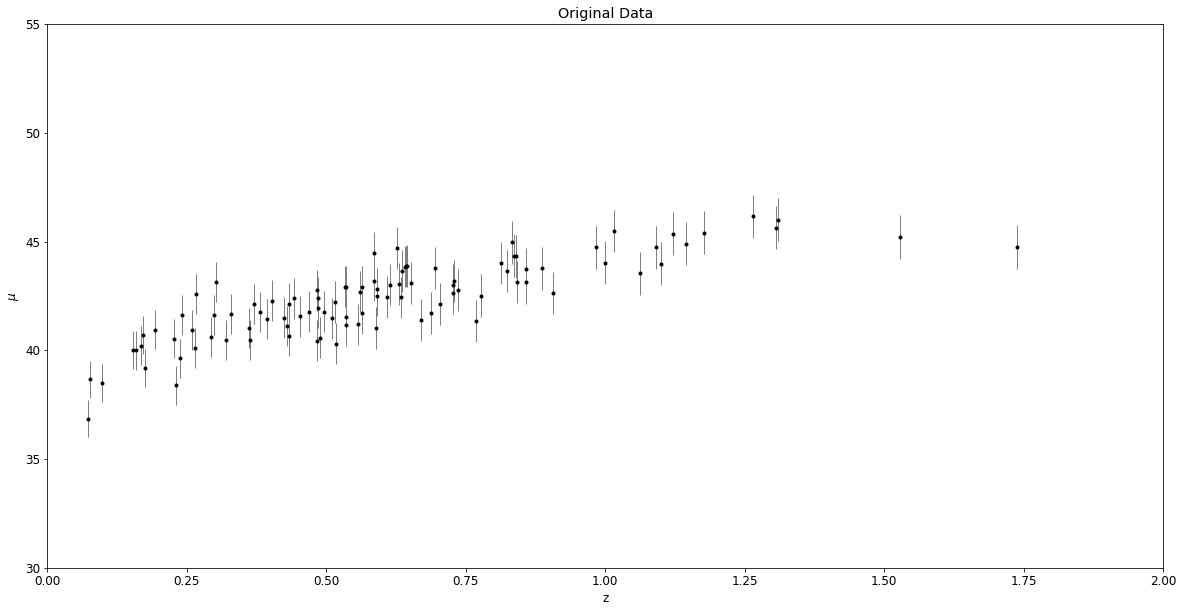

In [59]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.title('Original Data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(30, 55)
plt.show()

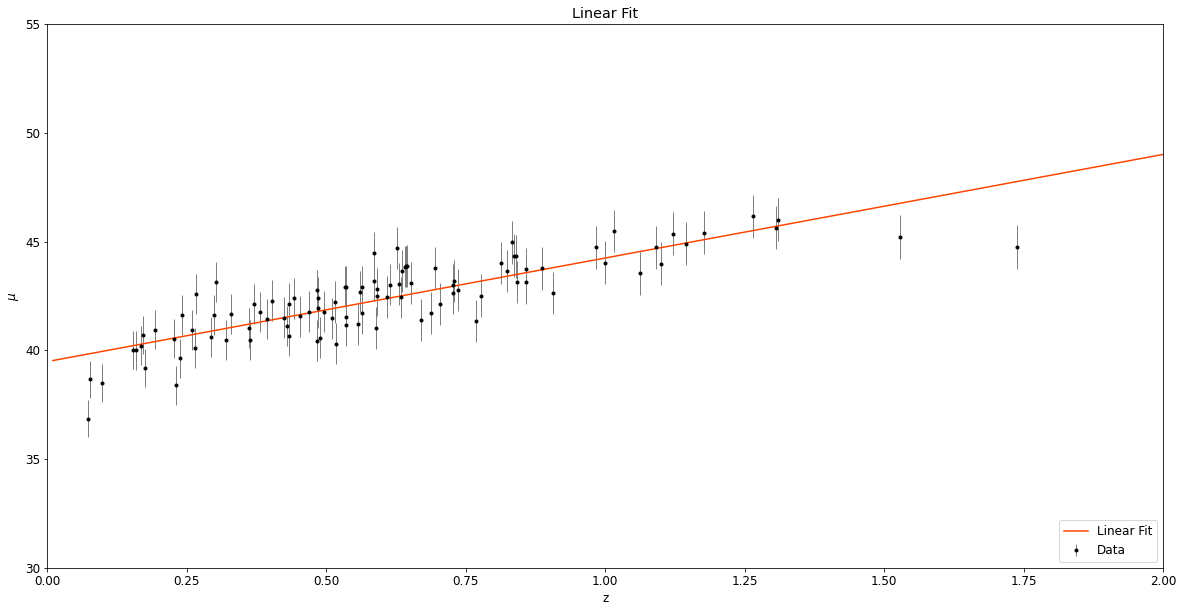

In [60]:
zgrid = np.linspace(0.01, 2, 1000)

model_linear = LinearRegression()
model_linear.fit(z_sample[:, None], mu_sample, dmu)
mu_fitted = model_linear.predict(zgrid[:, None])

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='Data')
plt.plot(zgrid, mu_fitted, lw=1.5, c='orangered', label='Linear Fit')
plt.title('Linear Fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(30, 55)
plt.legend(loc='lower right')
plt.show()

Polynomial coefficients:
 [ 36.95622821  21.50098389 -34.55444621  28.77101798  -8.39275909]


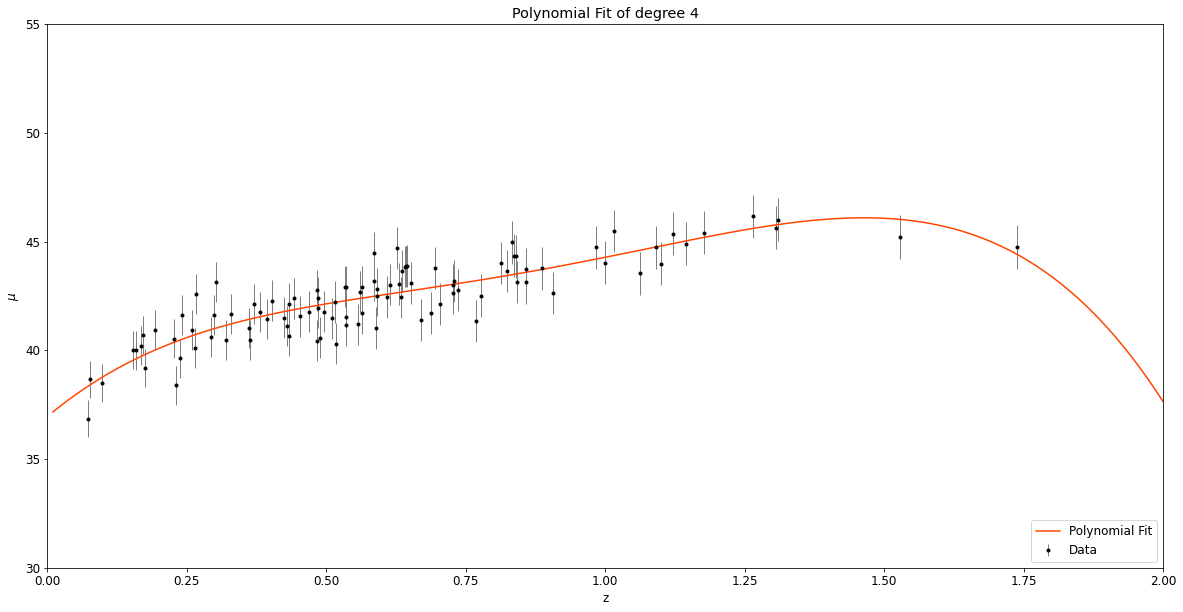

In [61]:
#Polynomial Regression
degree = 4
model_poly = PolynomialRegression(degree)
model_poly.fit(z_sample[:, None], mu_sample, dmu)

mu_fitted = model_poly.predict(zgrid[:, None])
print('Polynomial coefficients:\n', model_poly.coef_)

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='Data')
plt.plot(zgrid, mu_fitted, lw=1.5, c='orangered', label='Polynomial Fit')
plt.title('Polynomial Fit of degree {}'.format(degree))
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(30, 55)
plt.legend(loc='lower right')
plt.show()

Relative MSE for polynomial model of degree 1: 1.0328
Relative MSE for polynomial model of degree 2: 0.9457
Relative MSE for polynomial model of degree 3: 0.9399
Relative MSE for polynomial model of degree 4: 0.9348
Relative MSE for polynomial model of degree 5: 0.9142
Relative MSE for polynomial model of degree 6: 1.3158
Relative MSE for polynomial model of degree 7: 1.2684
Relative MSE for polynomial model of degree 8: 1.9176
Relative MSE for polynomial model of degree 9: 22.8769
Relative MSE for polynomial model of degree 10: 359.2310
Relative MSE for polynomial model of degree 11: 67951.4272
Relative MSE for polynomial model of degree 12: 85910.9366
Relative MSE for polynomial model of degree 13: 5310157.9985
Relative MSE for polynomial model of degree 14: 6004205.7821
Relative MSE for polynomial model of degree 15: 5817671.3611
Relative MSE for polynomial model of degree 16: 454125534.3438
Relative MSE for polynomial model of degree 17: 4108088821.1814
Relative MSE for polynomial 

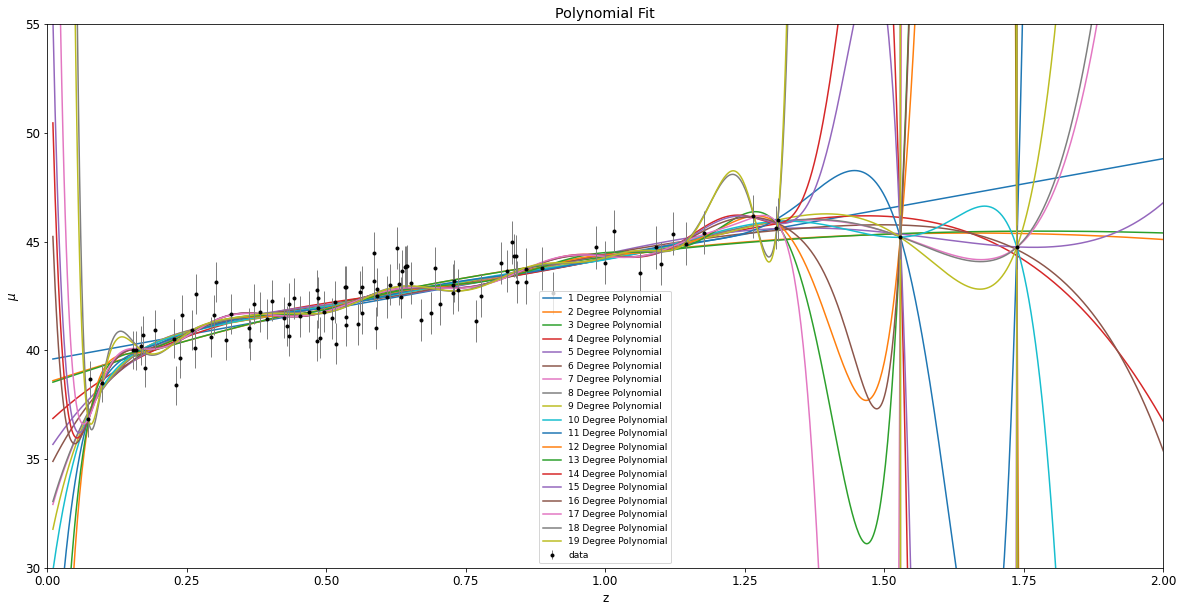

In [62]:
#K-Fold + Polynomial!!
n_splits = 10   #10 splits -> 10-Fold
fold = KFold(n_splits=n_splits, random_state=1234, shuffle=True)
fold.get_n_splits(z_sample)

#Aranging from 1 to (20 - 1) degrees for possible fits
degrees = np.arange(1, 20)
fold_MSE = []
fit_MSE= []

for i in degrees:
    #Initializing Model
    model = PolynomialRegression(i)

    #K-Fold
    for j, (train_index, test_index) in enumerate(fold.split(z_sample)):
        #Masking indexes on train and test subsets for each fold
        ztrain, ztest = z_sample[train_index], z_sample[test_index]
        mutrain, mutest = mu_sample[train_index], mu_sample[test_index]
        errtrain, errtest = dmu[train_index], dmu[test_index]
        
        #Fitting model
        model.fit(ztrain[:, None], mutrain, errtrain)
        
        #Evaluating Mean Square Error
        y_fitted = model.predict(ztest[:, None])
        fold_MSE.append(mean_squared_error(mutest, y_fitted))
    
    #Saving mean of MSE for each fold
    fit_MSE.append(np.mean(fold_MSE))
    print('Relative MSE for polynomial model of degree {}: {:.4f}'.format(i, np.mean(fit_MSE)))
    fold_MSE.clear()

    #Predicting on the whole set
    mu_fit = model.predict(zgrid[:, None])

    #Plotting
    plt.plot(zgrid, mu_fit, lw=1.5, label=str(i) + ' Degree Polynomial')

fit_MSE = np.array(fit_MSE)

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.title('Polynomial Fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(30, 55)
plt.legend(loc='best', fontsize=9)
plt.show()

Best fit for degree:  5


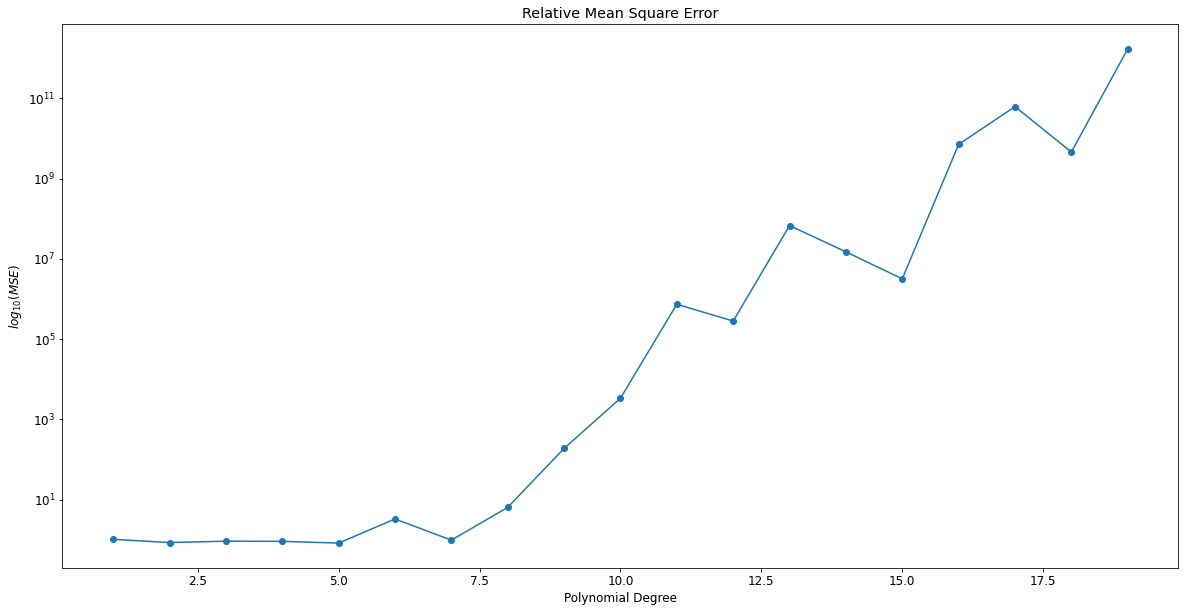

In [63]:
#Gathering best degree for fit by looking at the minimun of relative MSE
mask = (fit_MSE == np.min(fit_MSE))
deg_best = degrees[mask]
print('Best fit for degree: ', int(deg_best))

#Plotting
plt.plot(degrees, fit_MSE)
plt.scatter(degrees, fit_MSE)
plt.semilogy()
plt.ylabel(r'$log_{10}(MSE)$')
plt.xlabel('Polynomial Degree')
plt.title('Relative Mean Square Error')
plt.show()

### Let's see what happens when we drop the first 3 points

In [64]:
#Dropping first 3 points that may cause some funky stuff
new_z = np.sort(z_sample)
new_mu = np.sort(mu_sample)
new_dmu = np.sort(dmu)

new_z = z_sample[3:]
new_mu = mu_sample[3:]
new_dmu = dmu[3:]

MSE for polynomial model of degree 1: 1.0484
MSE for polynomial model of degree 2: 0.9687
MSE for polynomial model of degree 3: 0.9754
MSE for polynomial model of degree 4: 0.9705
MSE for polynomial model of degree 5: 0.9440
MSE for polynomial model of degree 6: 1.4109
MSE for polynomial model of degree 7: 1.3343
MSE for polynomial model of degree 8: 1.6826
MSE for polynomial model of degree 9: 1.7985
MSE for polynomial model of degree 10: 66.4565
MSE for polynomial model of degree 11: 18849.8416
MSE for polynomial model of degree 12: 22751.1905
MSE for polynomial model of degree 13: 983332.9681
MSE for polynomial model of degree 14: 3970070.8485
MSE for polynomial model of degree 15: 6690918.0455
MSE for polynomial model of degree 16: 509021620.8528
MSE for polynomial model of degree 17: 6324956194.7981
MSE for polynomial model of degree 18: 6829968387.6447
MSE for polynomial model of degree 19: 44485924866.8260


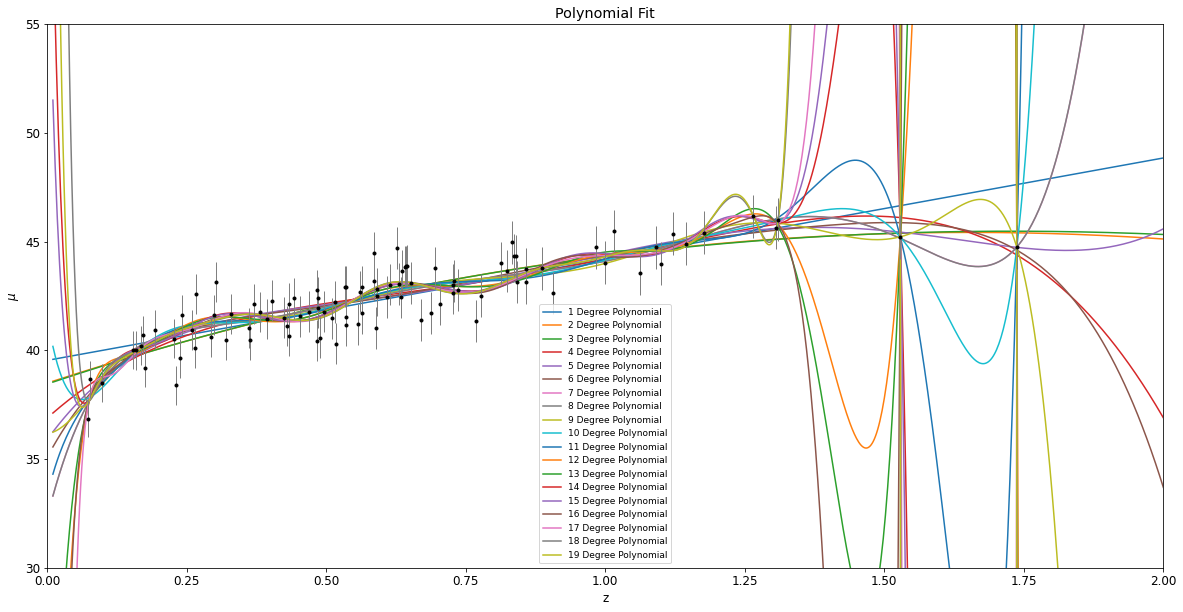

In [65]:
#K-Fold + Polynomial!!
n_splits = 10   #10 splits -> 10-Fold
fold = KFold(n_splits=n_splits, random_state=1234, shuffle=True)
fold.get_n_splits(new_z)

#Aranging from 1 to (20-1) degrees for possible fits
degrees = np.arange(1, 20)
fold_MSE = []
fit_MSE= []

for i in degrees:
    #Initializing Model
    model = PolynomialRegression(i)

    #K-Fold
    for j, (train_index, test_index) in enumerate(fold.split(new_z)):
        #Masking indexes on train and test subsets for each fold
        ztrain, ztest = new_z[train_index], new_z[test_index]
        mutrain, mutest = new_mu[train_index], new_mu[test_index]
        errtrain, errtest = new_dmu[train_index], new_dmu[test_index]
        
        #Fitting model
        model.fit(ztrain[:, None], mutrain, errtrain)
        
        #Evaluating Mean Square Error
        y_fitted = model.predict(ztest[:, None])
        fold_MSE.append(mean_squared_error(mutest, y_fitted))
    
    #Saving mean of MSE for each fold
    fit_MSE.append(np.mean(fold_MSE))
    print('MSE for polynomial model of degree {}: {:.4f}'.format(i, np.mean(fit_MSE)))
    fold_MSE.clear()

    #Predicting on the whole set
    mu_fit = model.predict(zgrid[:, None])

    #Plotting
    plt.plot(zgrid, mu_fit, lw=1.5, label=str(i) + ' Degree Polynomial')

fit_MSE = np.array(fit_MSE)

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.title('Polynomial Fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(30, 55)
plt.legend(loc='best', fontsize=9)
plt.show()

Best fit for degree:  5


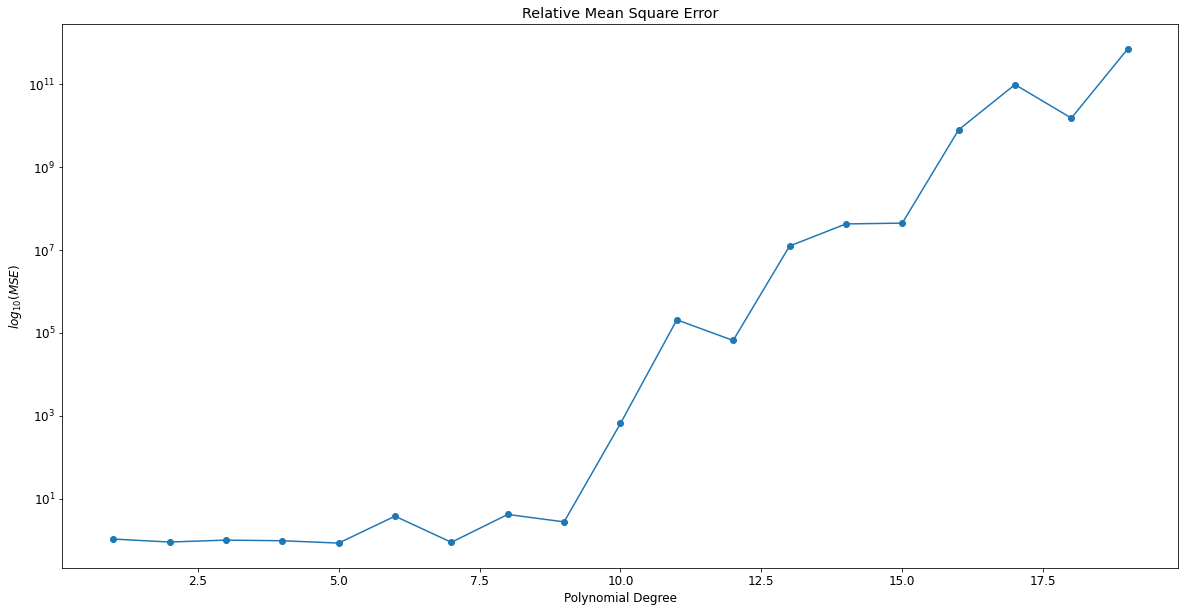

In [66]:
#Gathering best degree for fit by looking at the minimun of MSE
mask = (fit_MSE == np.min(fit_MSE))
deg_best = degrees[mask]
print('Best fit for degree: ', int(deg_best))

#Plotting
plt.plot(degrees, fit_MSE)
plt.scatter(degrees, fit_MSE)
plt.semilogy()
plt.ylabel(r'$log_{10}(MSE)$')
plt.xlabel('Polynomial Degree')
plt.title('Relative Mean Square Error')
plt.show()

In [67]:
#Removing the first points seems to have helped, let's make this decision final
z_sample = new_z
mu_sample = new_mu
dmu = new_dmu

### Basis Functions Regression

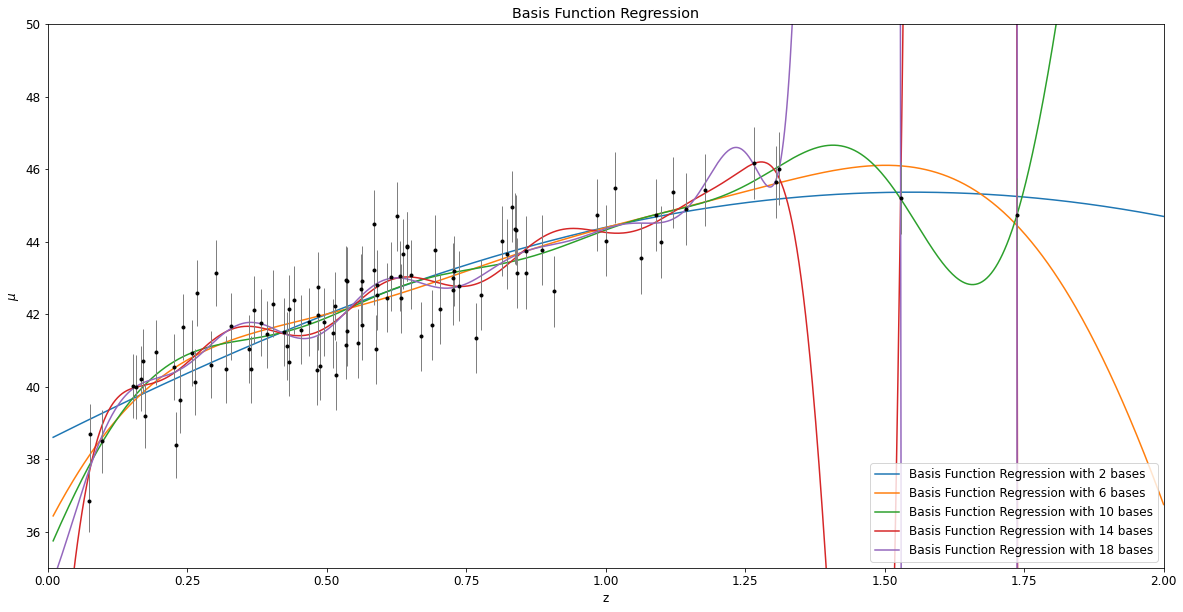

In [68]:
#Basis Function Regression BFR
for base in np.arange(1, 20)[1::4]:

    base_mu = np.linspace(0, 2, base)[:, None]
    base_sigma = 1.0 * (base_mu[1] - base_mu[0])

    #Basis Function Regressor
    bfr = BasisFunctionRegression(basis_func='gaussian', mu=base_mu, sigma=base_sigma)

    #Fitting
    bfr.fit(z_sample[:, None], mu_sample, dmu)

    #Predicting on whole zgrid
    pdf_bfr = bfr.predict(zgrid[:, None])
    plt.plot(zgrid, pdf_bfr, label=f'Basis Function Regression with {base} bases')

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.title('Basis Function Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.show()

### Kernel Regression

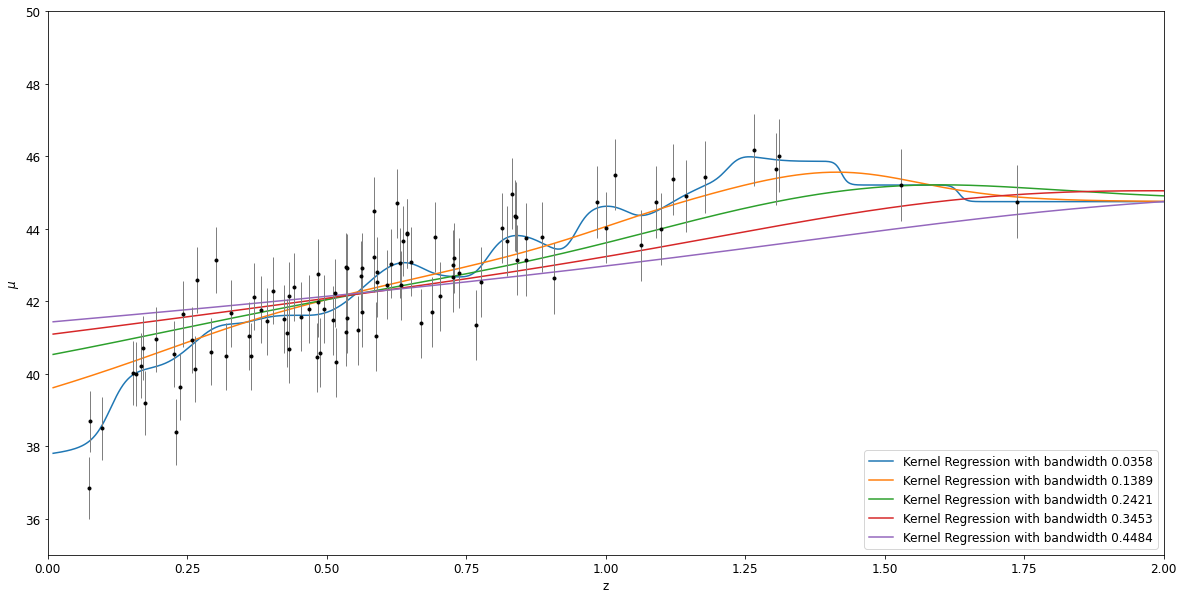

In [69]:
for bandwidth in np.linspace(0.01, 0.5, 20)[1::4]:
    #Kernel Regressor
    kern_reg = NadarayaWatson(kernel='gaussian', h=bandwidth)

    #Fitting
    kern_reg.fit(z_sample[:, None], mu_sample) # in this case dy is irrelevant!

    #Predicting on whole zgrid
    pdf_kernreg = kern_reg.predict(zgrid[:, None])
    plt.plot(zgrid, pdf_kernreg, label=f'Kernel Regression with bandwidth {bandwidth:.4f}')

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.show()

## Errors and Learning Curves

In [70]:
#Generalizing
x = z_sample[:, None]
y = mu_sample
dy = dmu

size = 0.3

xtrain, xtest, ytrain, ytest, dytrain, dytest = train_test_split(x, y, dy, test_size=size, random_state=0)

#### Linear Regression

In [71]:
reg = LinearRegression()

reg.fit(xtrain, ytrain, dytrain)

y_test_pred = reg.predict(xtest)
test_error = mean_squared_error(ytest, y_test_pred)

y_train_pred = reg.predict(xtrain)
train_error = mean_squared_error(ytrain, y_train_pred)

print(f'Linear Regression.\n-Train Error: {train_error:.4f}\n-Test Error: {test_error:.4f}')

Linear Regression.
-Train Error: 0.8490
-Test Error: 1.2648


In [72]:
error_train, error_test= [], []

#### Polynomial Regression

Polynomial Regression of degree 1.
-Train Error: 0.8490
-Test Error: 1.2648
Polynomial Regression of degree 2.
-Train Error: 0.8066
-Test Error: 0.9109
Polynomial Regression of degree 3.
-Train Error: 0.8068
-Test Error: 0.9434
Polynomial Regression of degree 4.
-Train Error: 0.7635
-Test Error: 1.0323
Polynomial Regression of degree 5.
-Train Error: 0.7613
-Test Error: 0.7604
Polynomial Regression of degree 6.
-Train Error: 0.7426
-Test Error: 9.0776
Polynomial Regression of degree 7.
-Train Error: 0.7424
-Test Error: 20.2891
Polynomial Regression of degree 8.
-Train Error: 0.7224
-Test Error: 604.1057
Polynomial Regression of degree 9.
-Train Error: 0.7195
-Test Error: 70.3602

Best fit for degree 5 with Test Error 0.7604


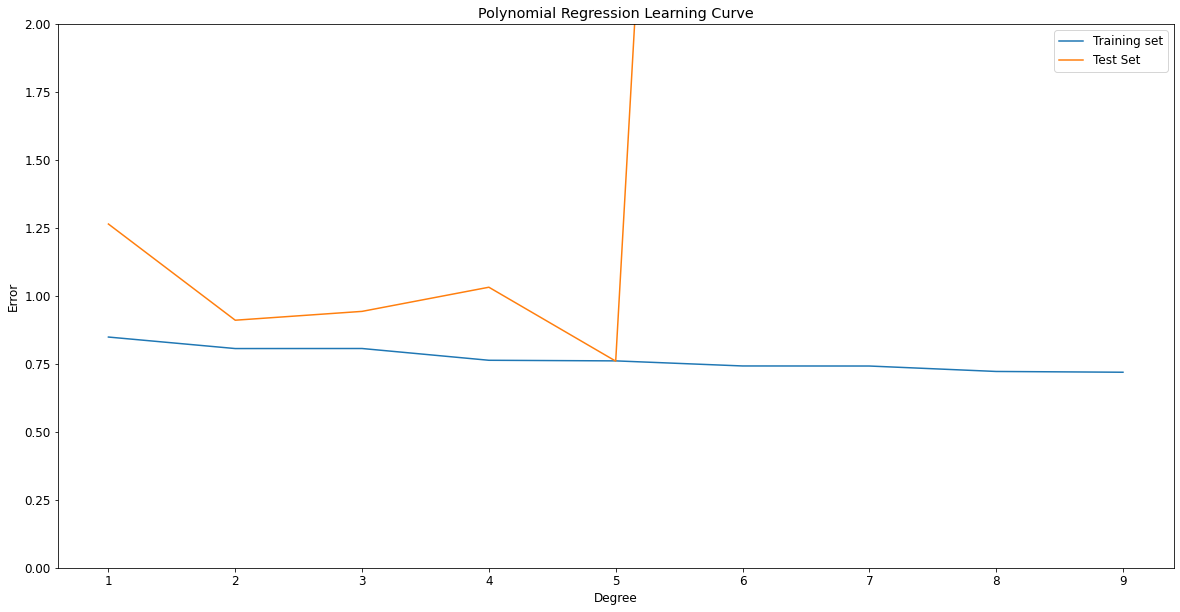

In [73]:
degree = np.arange(1, 10)

for n in degree:
    reg = PolynomialRegression(n)

    reg.fit(xtrain, ytrain, dytrain)

    #Mean Squared Error on Test Subset
    y_test_pred = reg.predict(xtest)
    test_error = mean_squared_error(ytest, y_test_pred)
    error_test.append(test_error)

    #Mean Squared Error on Train Subset
    y_train_pred = reg.predict(xtrain)
    train_error = mean_squared_error(ytrain, y_train_pred)
    error_train.append(train_error)

    print(f'Polynomial Regression of degree {n}.\n-Train Error: {train_error:.4f}\n-Test Error: {test_error:.4f}')

nbest = degree[np.argmin(error_test)]
poly_test_error_best = min(error_test)

print(f'\nBest fit for degree {nbest} with Test Error {poly_test_error_best:.4f}')

#Plotting
plt.plot(degree, error_train, label='Training set')
plt.plot(degree, error_test, label='Test Set')

plt.title('Polynomial Regression Learning Curve')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.ylim(0, 2)
plt.legend()
plt.show()

error_test.clear()
error_train.clear()

#### Basis Function Regression

Basis Function Regression with base 2.
-Train Error: 0.8083
-Test Error: 0.8965
Basis Function Regression with base 3.
-Train Error: 0.7907
-Test Error: 0.8381
Basis Function Regression with base 4.
-Train Error: 0.7676
-Test Error: 0.8796
Basis Function Regression with base 5.
-Train Error: 0.7637
-Test Error: 0.7791
Basis Function Regression with base 6.
-Train Error: 0.7378
-Test Error: 2.9120
Basis Function Regression with base 7.
-Train Error: 0.7359
-Test Error: 1.6507
Basis Function Regression with base 8.
-Train Error: 0.7326
-Test Error: 12.1358
Basis Function Regression with base 9.
-Train Error: 0.7284
-Test Error: 44.4488

Best fit for 5 bases with Test Error 0.7791


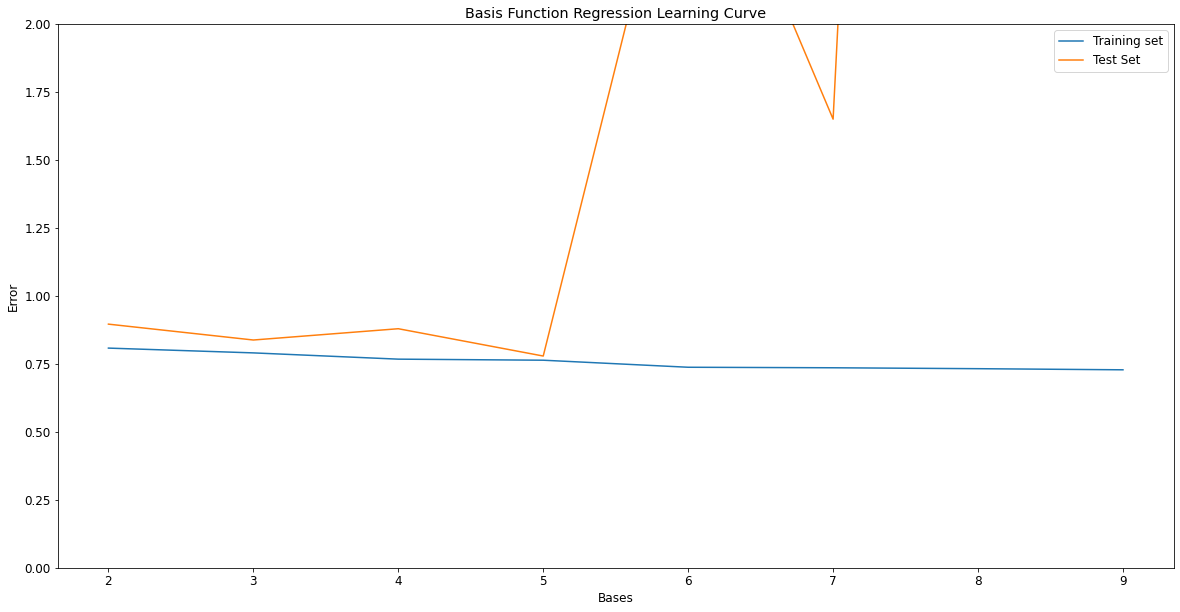

In [74]:
bases = np.arange(2, 10)

for base in bases:

    base_mu = np.linspace(0, 2, base)[:, None]
    base_sigma = 1.0 * (base_mu[1] - base_mu[0])

    reg = BasisFunctionRegression(basis_func='gaussian', mu=base_mu, sigma=base_sigma)
    reg.fit(xtrain, ytrain, dytrain)

    #Mean Squared Error on Test Subset
    y_test_pred = reg.predict(xtest)
    test_error = mean_squared_error(ytest, y_test_pred)
    error_test.append(test_error)

    #Mean Squared Error on Train Subset
    y_train_pred = reg.predict(xtrain)
    train_error = mean_squared_error(ytrain, y_train_pred)
    error_train.append(train_error)

    print(f'Basis Function Regression with base {base}.\n-Train Error: {train_error:.4f}\n-Test Error: {test_error:.4f}')

basebest = bases[np.argmin(error_test)]
base_test_error_best = min(error_test)

print(f'\nBest fit for {basebest} bases with Test Error {base_test_error_best:.4f}')

#Plotting
plt.plot(bases, error_train, label='Training set')
plt.plot(bases, error_test, label='Test Set')

plt.title('Basis Function Regression Learning Curve')
plt.xlabel('Bases')
plt.ylabel('Error')
plt.ylim(0, 2)
plt.legend()
plt.show()

error_test.clear()
error_train.clear()

#### Kernel Regression

Kernel Regression with bandwidth 0.0100.
-Train Error: 0.42375388456721375
-Test Error: 1.1572641051255015
Kernel Regression with bandwidth 0.0358.
-Train Error: 0.5741062545362996
-Test Error: 0.8243783676915234
Kernel Regression with bandwidth 0.0616.
-Train Error: 0.6814370678641176
-Test Error: 0.8524419356354301
Kernel Regression with bandwidth 0.0874.
-Train Error: 0.7619959674740807
-Test Error: 0.9247048630103337
Kernel Regression with bandwidth 0.1132.
-Train Error: 0.8162745928050759
-Test Error: 1.0017890115054313
Kernel Regression with bandwidth 0.1389.
-Train Error: 0.8614613238957305
-Test Error: 1.0863519129141854
Kernel Regression with bandwidth 0.1647.
-Train Error: 0.9120076320382107
-Test Error: 1.1822079299886743
Kernel Regression with bandwidth 0.1905.
-Train Error: 0.9729975030996814
-Test Error: 1.287984421753882
Kernel Regression with bandwidth 0.2163.
-Train Error: 1.0445449516163932
-Test Error: 1.3993373990311577
Kernel Regression with bandwidth 0.2421.
-Trai

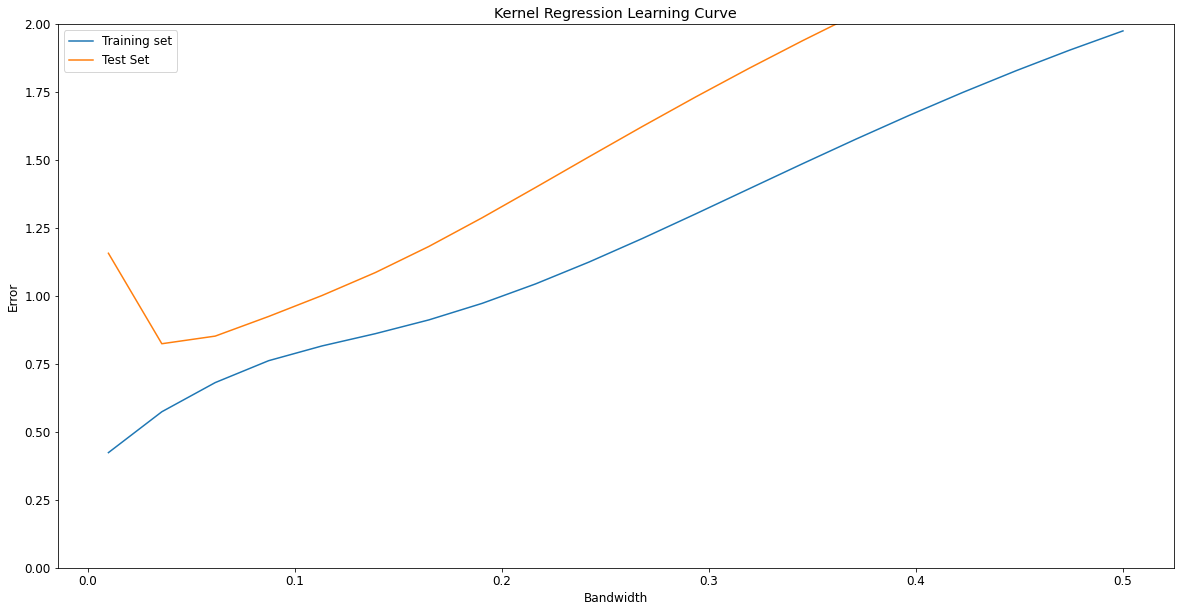

In [75]:
bandwidths = np.linspace(0.01, 0.5, 20)

for bandwidth in bandwidths:

    reg = NadarayaWatson(kernel='gaussian', h=bandwidth)
    reg.fit(xtrain, ytrain, dytrain)

    #Mean Squared Error on Test Subset
    y_test_pred = reg.predict(xtest)
    test_error = mean_squared_error(ytest, y_test_pred)
    error_test.append(test_error)

    #Mean Squared Error on Train Subset
    y_train_pred = reg.predict(xtrain)
    train_error = mean_squared_error(ytrain, y_train_pred)
    error_train.append(train_error)

    print(f'Kernel Regression with bandwidth {bandwidth:.4f}.\n-Train Error: {train_error}\n-Test Error: {test_error}')

bwbest = bandwidths[np.argmin(error_test)]
bw_test_error_best = min(error_test)

print(f'\nBest fit for bandwidth {bwbest:.4f} with Test Error {bw_test_error_best:.4f}')

#Plotting
plt.plot(bandwidths, error_train, label='Training set')
plt.plot(bandwidths, error_test, label='Test Set')

plt.title('Kernel Regression Learning Curve')
plt.xlabel('Bandwidth')
plt.ylabel('Error')
plt.ylim(0, 2)
plt.legend()
plt.show()

error_test.clear()
error_train.clear()

### Let's focus on Polynomial Regression.

Let's see if it can predict new points!

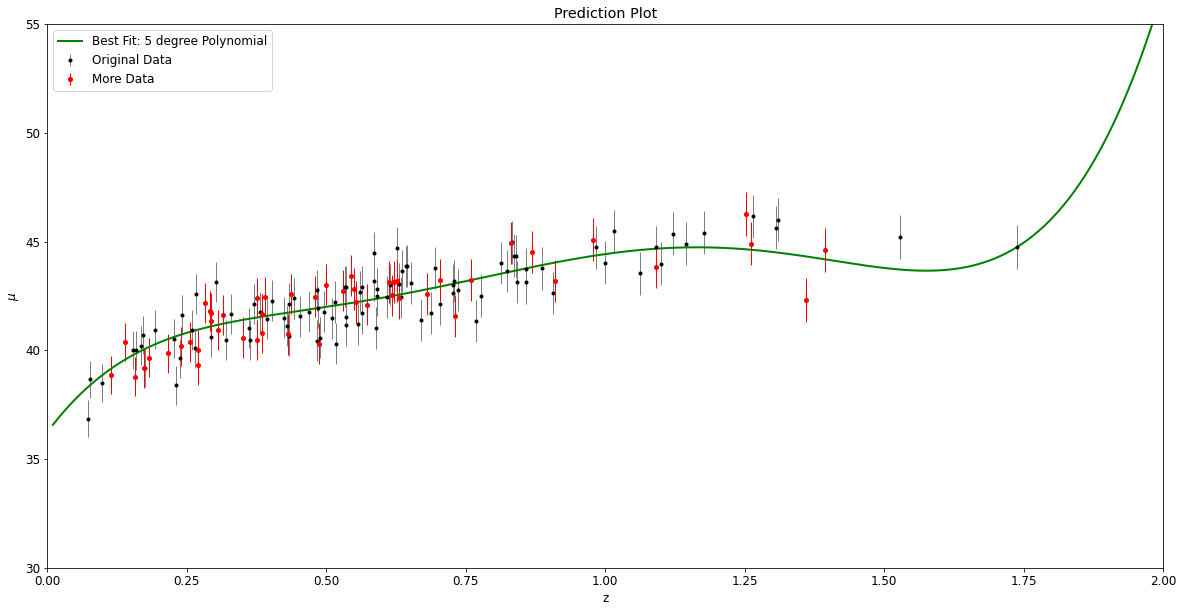

In [76]:
#New points
more_z, more_mu, more_dmu = generate_mu_z(50, random_state=42)

zgrid = np.linspace(0.01, 2, 1000)

#Generalizing
x = z_sample[:, None]
y = mu_sample
dy = dmu

size = 0.3
xtrain, xtest, ytrain, ytest, dytrain, dytest = train_test_split(x, y, dy, test_size=size)

#Fitting to the best model
bestreg = PolynomialRegression(nbest)
bestreg.fit(xtrain, ytrain, dytrain)
bestfit = bestreg.predict(zgrid[:, None])

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='Original Data')
plt.errorbar(more_z, more_mu, more_dmu, fmt='ro', markersize=4, ecolor='red', lw=1, label='More Data')
plt.plot(zgrid, bestfit, label=f'Best Fit: {nbest} degree Polynomial', c='green', lw=2)
plt.title('Prediction Plot')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(30, 55)
plt.legend()
plt.show()